In [86]:
# code nach https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # alle Ausgaben einer Zelle in iPython anzeiogen
import pandas as pd
pd.option_context('display.max_columns', None) # damit mehr als 20 Spalten angezeigt werden



path = 'c:/myBox/Projekte/FHDW/kurs DAML/python/Daten/DMC10/dmc2010_train.txt'

cat_cols = ['delivpostcode', 'advertisingdatacode', 'salutation', 'title',
                'domain', 'newsletter', 'model', 'paymenttype', 'deliverytype',
                'invoicepostcode', 'voucher', 'case', 'gift', 'entry', 'points',
                'shippingcosts']
num_cols = ['numberitems', 'weight', 'remi', 'cancel', 'used', 'w0', 'w1',
                'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'account_age']
date_cols = ['date', 'datecreated', 'deliverydatepromised', 'deliverydatereal']

target_col = 'target90'

df = pd.read_csv(path, sep=';', index_col='customernumber', parse_dates=date_cols,
                     dtype={col: 'category' for col in cat_cols})

df.info() # Welche Datentypen? Wo nicht Null-werte?
df.head().T # zeige die ersten 5 Datensätze mit vertauschten Spalten/Reihen (transposed)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32428 entries, 41191 to 58849
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  32428 non-null  datetime64[ns]
 1   salutation            32428 non-null  category      
 2   title                 32428 non-null  category      
 3   domain                32428 non-null  category      
 4   datecreated           32428 non-null  datetime64[ns]
 5   newsletter            32428 non-null  category      
 6   model                 32428 non-null  category      
 7   paymenttype           32428 non-null  category      
 8   deliverytype          32428 non-null  category      
 9   invoicepostcode       32428 non-null  category      
 10  delivpostcode         1392 non-null   category      
 11  voucher               32428 non-null  category      
 12  advertisingdatacode   6523 non-null   category      
 13  case        

customernumber,41191,38860,61917,40647,1347
date,2008-12-01 00:00:00,2008-12-16 00:00:00,2008-08-19 00:00:00,2008-06-16 00:00:00,2008-08-08 00:00:00
salutation,0,1,0,1,0
title,0,0,0,0,0
domain,9,4,12,8,1
datecreated,2008-12-01 00:00:00,2008-12-16 00:00:00,2008-08-19 00:00:00,2008-06-16 00:00:00,2008-08-08 00:00:00
newsletter,0,0,0,0,0
model,2,1,1,1,1
paymenttype,2,1,0,0,1
deliverytype,0,1,0,0,1
invoicepostcode,58,34,51,25,41


In [87]:
df.info()
df.head().T 
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32428 entries, 41191 to 58849
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  32428 non-null  datetime64[ns]
 1   salutation            32428 non-null  category      
 2   title                 32428 non-null  category      
 3   domain                32428 non-null  category      
 4   datecreated           32428 non-null  datetime64[ns]
 5   newsletter            32428 non-null  category      
 6   model                 32428 non-null  category      
 7   paymenttype           32428 non-null  category      
 8   deliverytype          32428 non-null  category      
 9   invoicepostcode       32428 non-null  category      
 10  delivpostcode         1392 non-null   category      
 11  voucher               32428 non-null  category      
 12  advertisingdatacode   6523 non-null   category      
 13  case        

customernumber,41191,38860,61917,40647,1347
date,2008-12-01 00:00:00,2008-12-16 00:00:00,2008-08-19 00:00:00,2008-06-16 00:00:00,2008-08-08 00:00:00
salutation,0,1,0,1,0
title,0,0,0,0,0
domain,9,4,12,8,1
datecreated,2008-12-01 00:00:00,2008-12-16 00:00:00,2008-08-19 00:00:00,2008-06-16 00:00:00,2008-08-08 00:00:00
newsletter,0,0,0,0,0
model,2,1,1,1,1
paymenttype,2,1,0,0,1
deliverytype,0,1,0,0,1
invoicepostcode,58,34,51,25,41


,numberitems,weight,remi,cancel,used,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
count,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000
mean,2.019551,637.920809,0.059979,0.061613,0.068860,0.902122,0.404342,0.276644,0.018903,0.047027,0.180986,0.027908,0.023128,0.000185,0.164981,0.092883,0.186598
std,1.726046,724.358131,0.388740,0.306833,0.474444,1.654767,1.410395,1.353981,0.253596,0.434265,0.561751,0.299862,0.401782,0.013601,0.836705,0.610509,0.389594
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,494.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,920.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,20076.000000,19.000000,17.000000,19.000000,99.000000,84.000000,90.000000,15.000000,36.000000,14.000000,27.000000,55.000000,1.000000,48.000000,50.000000,1.000000


In [88]:
print ("Welche Spalten enthalten NaN (not a number)?")
print(df.isna().sum())
df.drop(columns=['advertisingdatacode', 'delivpostcode'], inplace=True, axis=1)
print("NaN = %d" % df.isna().sum().sum())
print ("Für k-NN werden Datumsfelder entfernt.")
df.drop(columns=date_cols, inplace=True, axis=1)
df.info()

Welche Spalten enthalten NaN (not a number)?
date                        0
salutation                  0
title                       0
domain                      0
datecreated                 0
newsletter                  0
model                       0
paymenttype                 0
deliverytype                0
invoicepostcode             0
delivpostcode           31036
voucher                     0
advertisingdatacode     25905
case                        0
numberitems                 0
gift                        0
entry                       0
points                      0
shippingcosts               0
deliverydatepromised        0
deliverydatereal            0
weight                      0
remi                        0
cancel                      0
used                        0
w0                          0
w1                          0
w2                          0
w3                          0
w4                          0
w5                          0
w6                       

In [89]:
y = df['target90']
x = df.drop(['target90'], axis = 1)

x.head().T
y.head().T


customernumber,41191,38860,61917,40647,1347
salutation,0,1,0,1,0
title,0,0,0,0,0
domain,9,4,12,8,1
newsletter,0,0,0,0,0
model,2,1,1,1,1
paymenttype,2,1,0,0,1
deliverytype,0,1,0,0,1
invoicepostcode,58,34,51,25,41
voucher,1,0,0,0,0
case,2,2,1,3,4


customernumber
41191    0
38860    0
61917    0
40647    0
1347     0
Name: target90, dtype: int64

In [90]:

from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)
x_train.shape
y_train.shape
x_test.shape
y_test.shape
x_test.info()

(24321, 30)

(24321,)

(8107, 30)

(8107,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8107 entries, 60764 to 31952
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   salutation       8107 non-null   category
 1   title            8107 non-null   category
 2   domain           8107 non-null   category
 3   newsletter       8107 non-null   category
 4   model            8107 non-null   category
 5   paymenttype      8107 non-null   category
 6   deliverytype     8107 non-null   category
 7   invoicepostcode  8107 non-null   category
 8   voucher          8107 non-null   category
 9   case             8107 non-null   category
 10  numberitems      8107 non-null   int64   
 11  gift             8107 non-null   category
 12  entry            8107 non-null   category
 13  points           8107 non-null   category
 14  shippingcosts    8107 non-null   category
 15  weight           8107 non-null   int64   
 16  remi             8107 non-null   int6

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'F1 Score K Value')

Text(0.5, 0, 'K Value')

Text(0, 0.5, 'F1 Score')

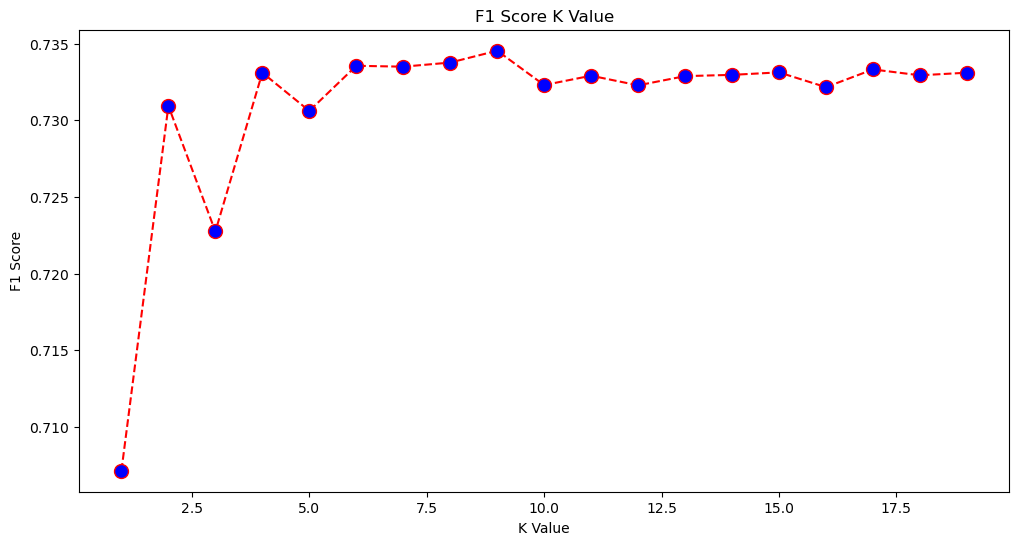

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 


f1s = []
# Calculating f1 score for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')